<figure>
  <IMG SRC="https://raw.githubusercontent.com/fmeer/public-files/main/TUlogo.png" WIDTH=200 ALIGN="right">
</figure>

# Frequency domain method of analysis using DSM - Notebook 4.2
    
In this notebook we formulate the governing equations, and find the steady state and transient response of a frame structure consisting of an Euler Bernoulli horizontal beam (girder), supported by two Euler Bernouli beams (columns). The beams are assumed inextensible for simplicity.

The studied problems is solved by a combination of analytical derivations and numerical implementations. Please follow the class instructions for all analytical derivations. The same problem has been also solved with the modal analysis method. Try to check the two files and observe the differences in the solutions adopted.

In [1]:
import numpy as np
import numpy.linalg as LA
import matplotlib.pyplot as plt
import pydynsm as PDM
import numpy.fft as fft

## The problem at hand
The problem that is solved in this excersise containts three EB beams that are connected as shown in the figure below:

<figure>
    <img src="Frame structure - lecture.png" 
         WIDTH=500 
         ALIGN=centre
         alt="Example: Frame structure subjected to general loading.">
    <figcaption> <center> <b>Example: Frame structure subjected to general loading.
    </figcaption>
</figure>
        
The left column is subjected to a distributed force, while the girder is excited by a point load applied at $x=x_0$. The columns share the same material properties; girder is assumed to have different bending rigidity and distributed mass per unit length. The properties of the columns and girder are described by $EI_C$ and $\rho A_C$, and $EI_G$ and $\rho A_G$, respectively. The displacement of the girder is indicated by $W$ while the displacemnt of the columns is given by $U$. 

## Formulate the governing equations
Formulate the governing equations of the system, including the equations of motions of both bars, the boundary and/or interface conditions
### Equations of motion
In this example, it is more convenient to split the girder into two parts and include the point load at the interface conditions:

$EI_G w_1^{(4)}(x,t) + \rho A_G \ddot{w}_{1}(x,t)=0\quad$ at $ x_0<x<x_1, y=y_1$<br>
$EI_G w_2^{(4)}(x,t) + \rho A_G \ddot{w}_{2}(x,t)=0\quad$ at $ x_1<x<x_2, y=y_1$<br>
$EI_C u_1^{(4)}(y,t) + \rho A_c \ddot{u}_{1}(y,t)=q_1(y,t) \quad$ at $ x=x_0, y_0<y<y_1$<br>
$EI_C u_2^{(4)}(y,t) + \rho A_c \ddot{u}_{2}(y,t)=0\quad$ at $ x=x_2, y_0<y<y_1$<br>

### BC and IC
At $x=x_0, y=y_0$:<br>
$u_{1}(y_0,t) = 0$<br>
$u_{1}'(y_0,t) = 0$

At $x=x_2, y=y_0$:<br>
$u_{2}(y_0,t) = 0$<br>
$u_{2}'(y_0,t) = 0$

At $x=x_0, y=y_1$:<br>
$u_1'(y_1,t)= w_1'(x_0,t)$<br>
$-EI_C u_1''(y_1,t)= -EI_G w_1''(x_0,t) \quad \rightarrow \quad \frac{EI_C}{EI_G} u_1''(y_1,t) = w_1''(x_0,t) = 0 $<br>
$w_1(x_0,t) = 0$

At $x=x_2, y=y_1$:<br>
$u_2'(y_1,t)= w_2'(x_2,t)$<br>
$-EI_C u_2''(y_1,t) -EI_G w_2''(x_2,t) = 0\quad \rightarrow \quad \frac{EI_C}{EI_G} u_2''(y_1,t) + w_2''(x_2,t) = 0 $<br>
$w_2(x_2,t) = 0$

at $x=x, y=y_1$<br>
$u_1(y_1,t)=u_2(y_1,t)$<br>
$-EI_C u_1'''(y_1,t)-EI_C u_2'''(y_1,t) = -m_G \ddot{u}_1(y_1,t) \quad \rightarrow \quad u_1'''(y_1,t)+u_2'''(y_1,t) = \frac{m_G}{EI_C} \ddot{u}_1(y_1,t) $
See that in this last equation, the mass of the girder is included as a interface condition, with $m_G = \rho A_G (x_2-x_0)$

at $x=x_1, y=y_1$<br>
$w_1(x_1,t)=w_2(x_1,t)$<br>
$w_1'(x_1,t)=w_2'(x_1,t)$<br>
$-EI_G w_1''(x_1,t)=-EI_Gw_2''(x_1,t) \quad \rightarrow \quad w_1''(x_1,t)=w_2''(x_1,t)$<br>
$-EI_G w_1'''(x_1,t)=-EI_Gw_2'''(x_1,t) + P(t) \quad \rightarrow \quad w_1'''(x_1,t)=w_2'''(x_1,t) =\frac{P(t)}{EI_G} $




## Steady state response
Find the steady state response of the system by assuming the harmonmic forces: $P(t) = P_0 \cos{\Omega t}$ and $q_1(y,t) = Q_1\cos(\Omega t)$. Try to find the general solution algebraicly upto the point numerical evaluation is required. The parameters that are used are:

In [2]:
x_0=0
x_1=6
x_2=8

y_0=0
y_1=6

E = 210e9
rho = 7850

EI_G = 2e5
I_G = EI_G/E
W_G = EI_G/10
rhoA_G = 60
A_G = rhoA_G/rho


EI_C = 8e4
I_C = EI_C/E
W_C = EI_C/10
rhoA_C = 40
A_C = rhoA_C/rho


f = 20
Omega = 2 * np.pi * f

P_0 = 70
Q_1 = 5

### Assumed solution
$w_{i}(x,t) = \text{Re}(W_{i}(x)e^{i\Omega t}), \qquad i=1,2$ <br>
$u_{i}(y,t) = \text{Re}(U_{i}(y)e^{i\Omega t}), \qquad i=1,2$

Substiute this in the equations of motion:<br>
$EI_G W_1^{(4)}(x) - \Omega^2\rho A_G W_{1}(x)=0\quad$ at $ x_0<x<x_1, y=y_1$<br>
$EI_G W_2^{(4)}(x) - \Omega^2\rho A_G W_{2}(x)=0\quad$ at $ x_1<x<x_2, y=y_1$<br>
$EI_C U_1^{(4)}(y) - \Omega^2\rho A_c U_{1}(y)=Q_1 \quad$ at $ x=x_0, y_0<y<y_1$<br>
$EI_C U_2^{(4)}(y) - \Omega^2\rho A_c U_{2}(y)=0\quad$ at $ x=x_2, y_0<y<y_1$<br>

### General solution frequency domain
The general solution for these hold:<br>
$W_1 = C_{11} e^{-\beta_G (x - x_0)} + C_{12} e^{\beta_G (x - x_1)} + C_{13} e^{-i \beta_G (x - x_0)} + C_{14}  e^{i \beta_G   (x - x_1)}$<br>
$W_2 = C_{21} e^{-\beta_G (x - x_1)} + C_{22} e^{\beta_G (x - x_2)} + C_{23} e^{-i \beta_G (x - x_1)} + C_{24} e^{i \beta_G  (x - x_2)}$<br>
$U_1 = C_{31} e^{-\beta_C (y - y_0)} + C_{32} e^{\beta_C (y - y_1)} + C_{33} e^{-i \beta_C y} + C_{34}  e^{i \beta_C y} - \frac{Q_1}{\rho A_C\omega^{2}} $<br>
$U_2 = C_{41} e^{-\beta_C (y - y_0)} + C_{42} e^{\beta_C (y - y_1)} + C_{43} e^{-i \beta_C (y - y_0)} + C_{44}  e^{i \beta_C  (y - y_1)}$<br>

The wavenumbers $\beta_G$ and $\beta_C$ are:<br>
$\beta_G^4 = \frac{\omega^2 \rho A_G}{ EI_G}$<br>
$\beta_C^4 = \frac{\omega^2 \rho A_C}{EI_C}$

### Boundary value problem
Substituting the general solutions in the boundary and interface conditions gives the boundary value problem:


In [3]:
Assembler = PDM.Assembler
s1 = Assembler('Frame')

Assembler 'Frame' successfully initialised


### Plot Results
Below we create a function that can plot the displacements of the original shape, too show the deformation of the structure. Thereafter, the deformation is plotted of the whole structure and, the displacement, rotation, moment and shearforce are shown for the girder. 

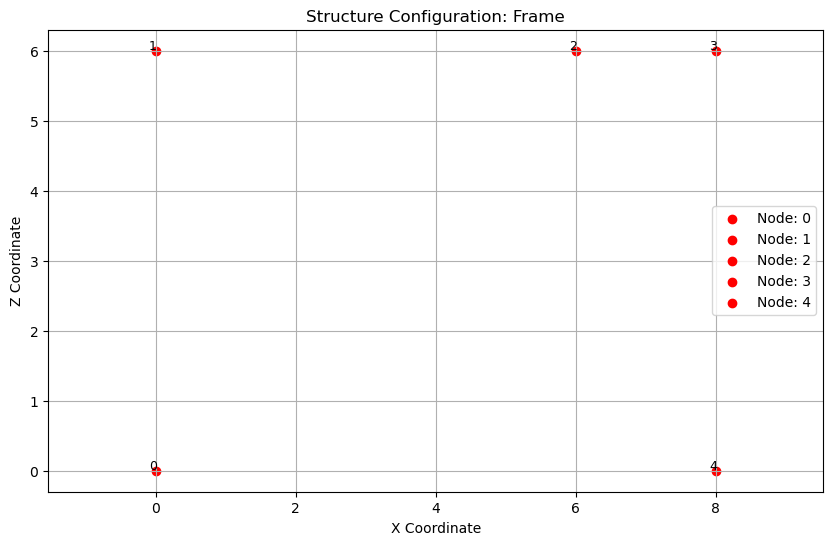

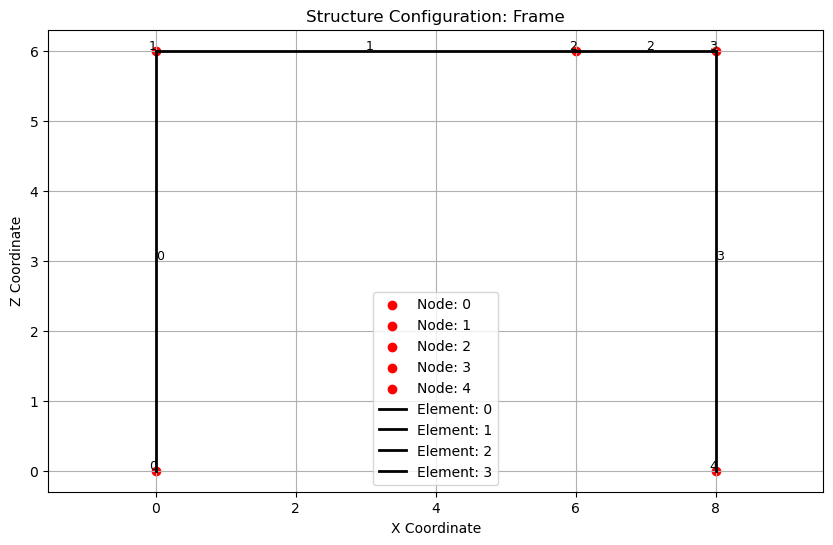

Global DOF 'x' for node 0 updated to 0.
Global DOF 'x' with value '0' applied to connected elements.
Global DOF 'z' for node 0 updated to 0.
Global DOF 'z' with value '0' applied to connected elements.
Global DOF 'phi_y' for node 0 updated to 0.
Global DOF 'phi_y' with value '0' applied to connected elements.
Global DOF 'x' for node 4 updated to 0.
Global DOF 'x' with value '0' applied to connected elements.
Global DOF 'z' for node 4 updated to 0.
Global DOF 'z' with value '0' applied to connected elements.
Global DOF 'phi_y' for node 4 updated to 0.
Global DOF 'phi_y' with value '0' applied to connected elements.
Successfully added element of type: EulerBernoulli Beam to Element 0
Successfully added element of type: EulerBernoulli Beam to Element 1
Successfully added element of type: EulerBernoulli Beam to Element 2
Successfully added element of type: EulerBernoulli Beam to Element 3
Successfully added element of type: Rod to Element 0
Successfully added element of type: Rod to Elemen

In [4]:
# draw the frame

nodes = []

nodes.append(s1.CreateNode(0,0))
nodes.append(s1.CreateNode(0,y_1))
nodes.append(s1.CreateNode(x_1,y_1))
nodes.append(s1.CreateNode(x_2,y_1))
nodes.append(s1.CreateNode(x_2,0))


s1.PlotStructure()

elements = []

elements.append(s1.CreateElement([nodes[0],nodes[1]]))
elements.append(s1.CreateElement([nodes[1],nodes[2]]))
elements.append(s1.CreateElement([nodes[2],nodes[3]]))
elements.append(s1.CreateElement([nodes[3],nodes[4]]))
s1.PlotStructure(plot_elements=True)


nodes[0].fix_node('x','z','phi_y')
nodes[4].fix_node('x','z','phi_y')


# assign parameters
column = {}
column['E'] = E
column['A'] = A_C
column['Ib'] = I_C
column['Wb'] = W_C
column['ksi'] = 0.05
column['rho'] = rho

beam = {}
beam['E'] = E
beam['A'] = A_G
beam['Ib'] = I_G
beam['Wb'] = W_G
beam['ksi'] = 0.05
beam['rho'] = rho

rodb = {}
rodb['E'] = 1*E
rodb['A'] = A_G
rodb['ksi'] = 0.05
rodb['rho'] = rho

rodc = {}
rodc['E'] = 1*E
rodc['A'] = A_C
rodc['ksi'] = 0.05
rodc['rho'] = rho

# assign sections
elements[0].SetSection('EulerBernoulli Beam', column)
elements[1].SetSection('EulerBernoulli Beam', beam)
elements[2].SetSection('EulerBernoulli Beam', beam)
elements[3].SetSection('EulerBernoulli Beam', column)

elements[0].SetSection('Rod', rodc)
elements[1].SetSection('Rod', rodb)
elements[2].SetSection('Rod', rodb)
elements[3].SetSection('Rod', rodc)

In [5]:
P = lambda omega: P_0  if omega == Omega else 0
q = lambda omega: Q_1  if omega == Omega else 0

elements[0].AddDistributedLoad(z=q)
nodes[2].add_load(z=P)
s1.run_connectivity()
Kc_global = s1.GlobalConstrainedStiffness(Omega)
Fc_global = s1.GlobalConstrainedForce(Omega)
# %% solve for free node displacements
u_free = s1.SolveUfree(Kc_global, Fc_global)
# %% post-processing
u_elem = s1.FullDisplacement(u_free)
disp = s1.ElementDisplacements(u_elem, Omega,num_points=8000)
forces = s1.ElementForces(u_elem, Omega,num_points=8000)

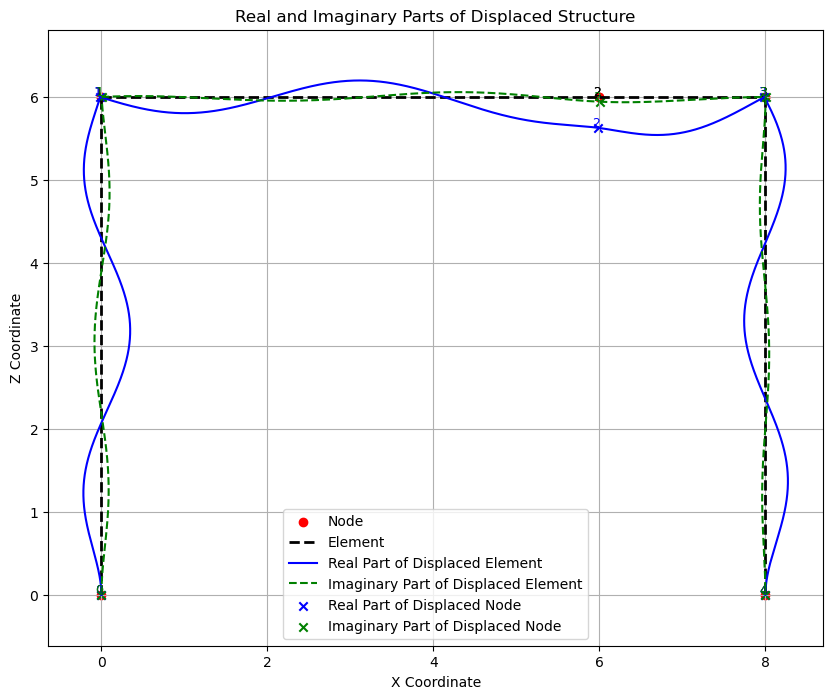

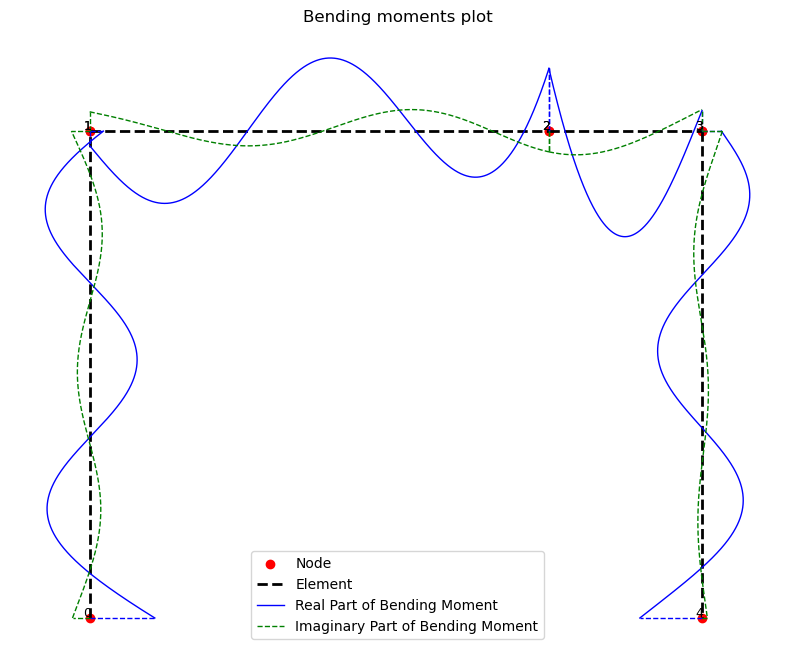

In [6]:
s1.PlotElementDisplacements(disp,scale=1e4)
s1.PlotMoments(forces,scale=1e-1)

In [7]:
num_points = 8000
local_coords_girder = np.concatenate((elements[1].L*np.linspace(0,1,num_points),
                                    (elements[2].L*np.linspace(0,1,num_points)+elements[1].L)
))
local_disp_girder = np.concatenate((disp[elements[1].id][1],disp[elements[2].id][1]))
local_rtt_girder = np.concatenate((disp[elements[1].id][-1],disp[elements[2].id][-1]))
local_sf_girder = np.concatenate((forces[elements[1].id][1],forces[elements[2].id][1]))
local_mmt_girder = np.concatenate((forces[elements[1].id][-1],forces[elements[2].id][-1]))

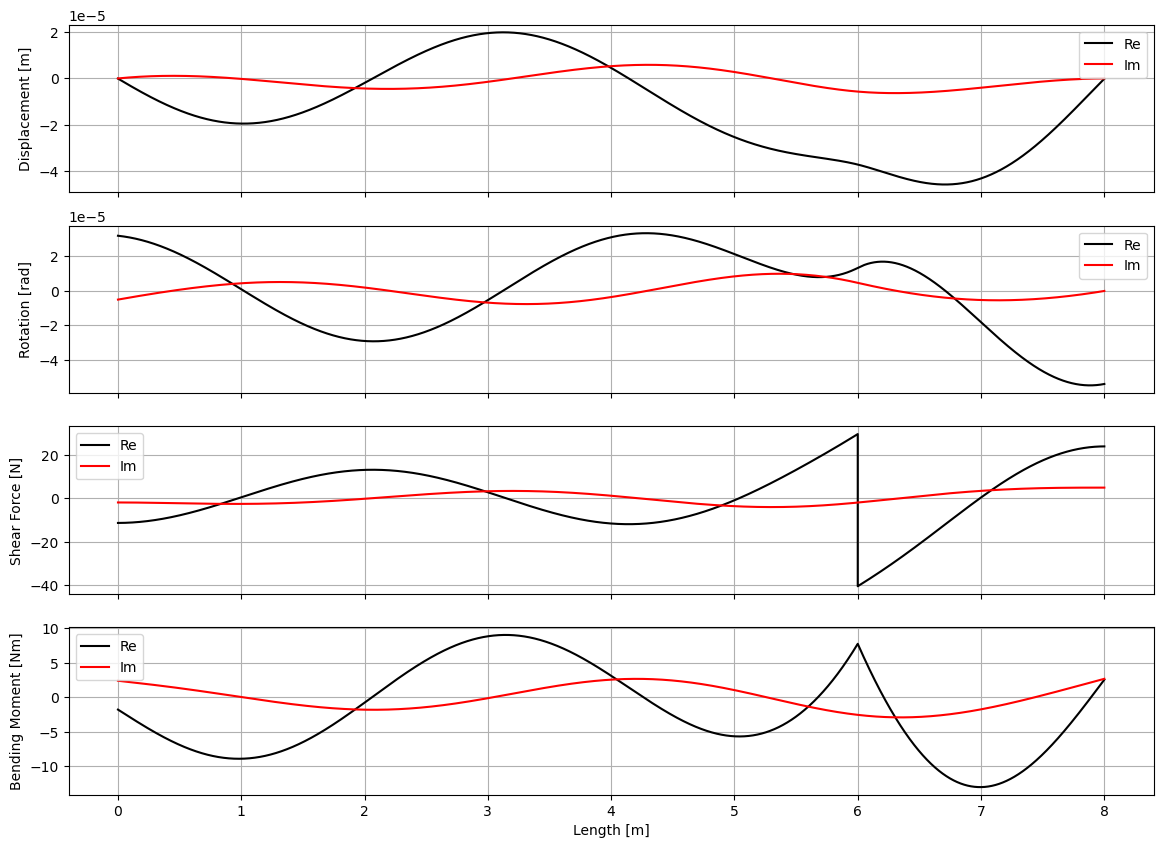

In [8]:
fig, axs = plt.subplots(4, 1, sharex=True, figsize=(14,10))
axs[0].plot(local_coords_girder,(local_disp_girder).real,'k',label='Re')
axs[0].plot(local_coords_girder,(local_disp_girder).imag,'r',label='Im')
axs[0].set_ylabel('Displacement [m]')

axs[1].plot(local_coords_girder,(local_rtt_girder).real,'k',label='Re')
axs[1].plot(local_coords_girder,(local_rtt_girder).imag,'r',label='Im')
axs[1].set_ylabel('Rotation [rad]')

axs[2].plot(local_coords_girder,(local_sf_girder).real,'k',label='Re')
axs[2].plot(local_coords_girder,(local_sf_girder).imag,'r',label='Im')
axs[2].set_ylabel('Shear Force [N]')

axs[3].plot(local_coords_girder,(local_mmt_girder).real,'k',label='Re')
axs[3].plot(local_coords_girder,(local_mmt_girder).imag,'r',label='Im')
axs[3].set_ylabel('Bending Moment [Nm]')
plt.xlabel('Length [m]')

for ax in axs:
    ax.legend()
    ax.grid()

plt.show()

## Time domain response obtained via the Fourier Transform (FFT)
In this section we will find the time domain response of the distributed q load and a point load (P). The load a smooth variant on a single sinusoidal load, given by the function below. The load and its fourier transform are shown below. 

In [9]:
def force_time(Amp,f0,t0,t): 
    return Amp*(1-np.cos(2*np.pi*f0*(t-t0)))*np.sin(2*np.pi*f0*(t-t0))*(t>t0)*((t-t0)<1/f0)

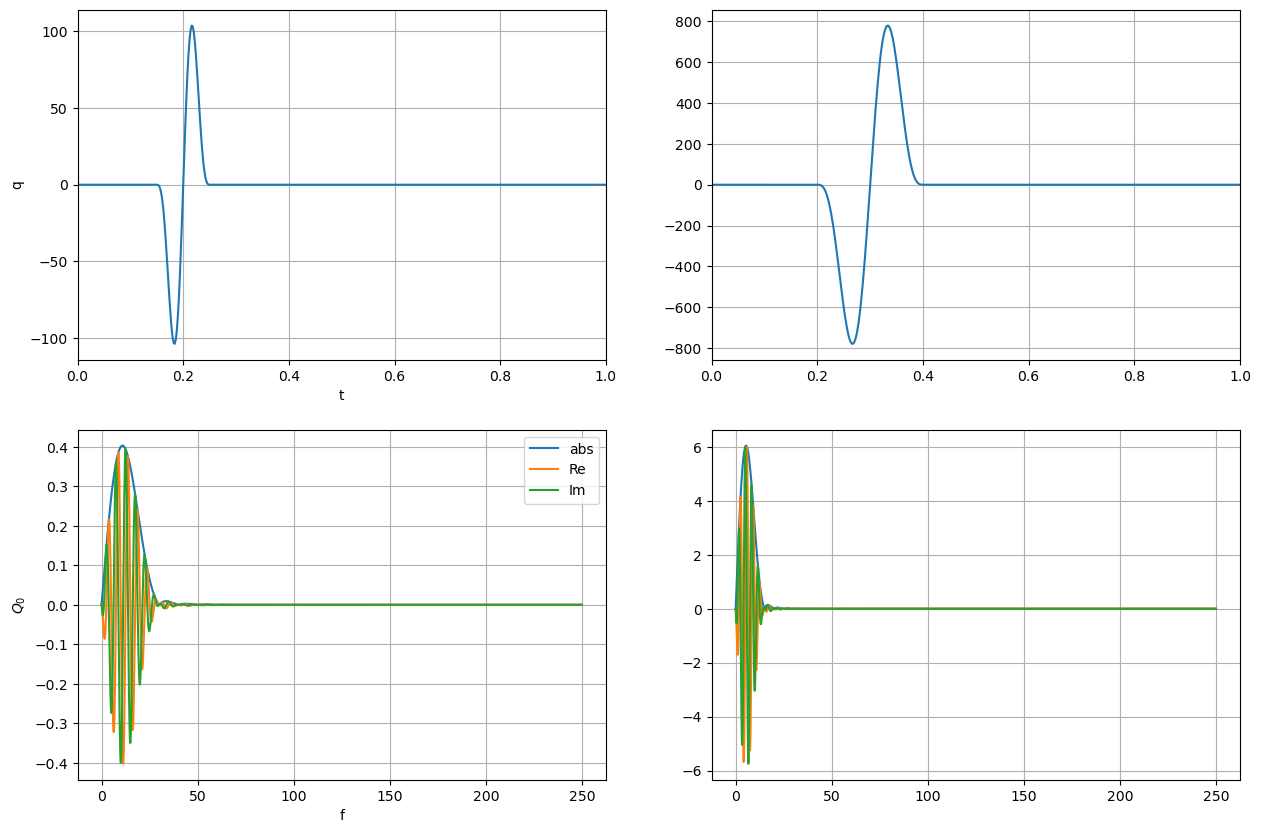

In [11]:
t=np.linspace(0,20,10000,endpoint=False)
N = len(t)
q_load_time = force_time(80,10,0.15,t) 
P_load_time = force_time(600,5,0.2,t) 
Q_omega = fft.rfft(q_load_time)   * 2  / N
P_omega = fft.rfft(P_load_time)   * 2  / N

freq = fft.rfftfreq(N,t[1])
fig,axs = plt.subplots(2,2,figsize=(15,10))
axs[0,0].plot(t,q_load_time)
axs[0,0].set_xlim([0,1])
axs[1,0].plot(freq,abs(Q_omega))
axs[1,0].plot(freq,np.real(Q_omega))
axs[1,0].plot(freq,np.imag(Q_omega))
axs[0,1].plot(t,P_load_time)
axs[0,1].set_xlim([0,1])
axs[1,1].plot(freq,abs(P_omega))
axs[1,1].plot(freq,np.real(P_omega))
axs[1,1].plot(freq,np.imag(P_omega))
for ax in axs.flat:
    ax.grid()
axs[0,0].set_xlabel('t')
axs[0,0].set_ylabel('q')
axs[1,0].set_xlabel('f')
axs[1,0].set_ylabel('$Q_0$')
axs[1,0].legend(['abs','Re', 'Im'])
omega = 2 * np.pi * freq
omega[0] = 1e-3 # Approach 0 frequency that gives a numerical error, because of defiding by 0.  

### Find the response at the center of the girder and of the left column
The response is asked at the center of the girder and at the center of the left column, thus at (x=x2/2, y=y1) and (x=0, y=y1/2). First the responses to a unit distributed load (Q) and a unit point load (P) are found in W and U1 at the specified location.

In [16]:
s2 = Assembler('Frame Time Response - P')

# %%% Initialise an assembler with your project name

nodes = []

nodes.append(s2.CreateNode(0,0))
nodes.append(s2.CreateNode(0,y_1))
nodes.append(s2.CreateNode(x_1,y_1))
nodes.append(s2.CreateNode(x_2,y_1))
nodes.append(s2.CreateNode(x_2,0))

elements = []

elements.append(s2.CreateElement([nodes[0],nodes[1]]))
elements.append(s2.CreateElement([nodes[1],nodes[2]]))
elements.append(s2.CreateElement([nodes[2],nodes[3]]))
elements.append(s2.CreateElement([nodes[3],nodes[4]]))

nodes[0].fix_node('x','z','phi_y')
nodes[4].fix_node('x','z','phi_y')

elements[0].SetSection('EulerBernoulli Beam', column)
elements[1].SetSection('EulerBernoulli Beam', beam)
elements[2].SetSection('EulerBernoulli Beam', beam)
elements[3].SetSection('EulerBernoulli Beam', column)

elements[0].SetSection('Rod', rodc)
elements[1].SetSection('Rod', rodb)
elements[2].SetSection('Rod', rodb)
elements[3].SetSection('Rod', rodc)

# P = lambda Omega: -1  if Omega == ww else 0
P = 1 # constant load means for every frequency we have the same value
nodes[2].add_load(z=P)

n_points = 1000
s2.run_connectivity()
U1_center_P = np.zeros(len(omega),complex)
W_center_P = np.zeros(len(omega),complex)
U1_center_Q = np.zeros(len(omega),complex)
W_center_Q = np.zeros(len(omega),complex)

for ii, ww in enumerate(omega):

    Kc_global = s2.GlobalConstrainedStiffness(ww)
    Fc_global = s2.GlobalConstrainedForce(ww)
    u_free = s2.SolveUfree(Kc_global, Fc_global)
    U1_center_P[ii] = s2.ElementDisplacements(s2.FullDisplacement(u_free),ww,num_points=n_points)[elements[0].id][0][n_points//2]
    W_center_P[ii] = s2.ElementDisplacements(s2.FullDisplacement(u_free),ww,num_points=n_points)[elements[1].id][1][n_points//2]    

Assembler 'Frame Time Response - P' successfully initialised
Global DOF 'x' for node 5 updated to 0.
Global DOF 'x' with value '0' applied to connected elements.
Global DOF 'z' for node 5 updated to 0.
Global DOF 'z' with value '0' applied to connected elements.
Global DOF 'phi_y' for node 5 updated to 0.
Global DOF 'phi_y' with value '0' applied to connected elements.
Global DOF 'x' for node 9 updated to 0.
Global DOF 'x' with value '0' applied to connected elements.
Global DOF 'z' for node 9 updated to 0.
Global DOF 'z' with value '0' applied to connected elements.
Global DOF 'phi_y' for node 9 updated to 0.
Global DOF 'phi_y' with value '0' applied to connected elements.
Successfully added element of type: EulerBernoulli Beam to Element 4
Successfully added element of type: EulerBernoulli Beam to Element 5
Successfully added element of type: EulerBernoulli Beam to Element 6
Successfully added element of type: EulerBernoulli Beam to Element 7
Successfully added element of type: Rod t

In [17]:
s3 = Assembler('Frame Time Response - Q')

# %%% Initialise an assembler with your project name

nodes = []

nodes.append(s3.CreateNode(0,0))
nodes.append(s3.CreateNode(0,y_1))
nodes.append(s3.CreateNode(x_1,y_1))
nodes.append(s3.CreateNode(x_2,y_1))
nodes.append(s3.CreateNode(x_2,0))

elements = []

elements.append(s3.CreateElement([nodes[0],nodes[1]]))
elements.append(s3.CreateElement([nodes[1],nodes[2]]))
elements.append(s3.CreateElement([nodes[2],nodes[3]]))
elements.append(s3.CreateElement([nodes[3],nodes[4]]))

nodes[0].fix_node('x','z','phi_y')
nodes[4].fix_node('x','z','phi_y')

elements[0].SetSection('EulerBernoulli Beam', column)
elements[1].SetSection('EulerBernoulli Beam', beam)
elements[2].SetSection('EulerBernoulli Beam', beam)
elements[3].SetSection('EulerBernoulli Beam', column)

elements[0].SetSection('Rod', rodc)
elements[1].SetSection('Rod', rodb)
elements[2].SetSection('Rod', rodb)
elements[3].SetSection('Rod', rodc)

# Q = lambda Omega: -1  if Omega == ww else 0
Q = 1 # constant load means for every frequency we have the same value
elements[0].AddDistributedLoad(z=Q)

n_points = 1000
s3.run_connectivity()

for ii, ww in enumerate(omega):

    Kc_global = s3.GlobalConstrainedStiffness(ww)
    Fc_global = s3.GlobalConstrainedForce(ww)
    u_free = s3.SolveUfree(Kc_global, Fc_global)
    U1_center_Q[ii] = s3.ElementDisplacements(s3.FullDisplacement(u_free),ww,num_points=n_points)[elements[0].id][0][n_points//2]
    W_center_Q[ii] = s3.ElementDisplacements(s3.FullDisplacement(u_free),ww,num_points=n_points)[elements[1].id][1][n_points//2]

Assembler 'Frame Time Response - Q' successfully initialised
Global DOF 'x' for node 10 updated to 0.
Global DOF 'x' with value '0' applied to connected elements.
Global DOF 'z' for node 10 updated to 0.
Global DOF 'z' with value '0' applied to connected elements.
Global DOF 'phi_y' for node 10 updated to 0.
Global DOF 'phi_y' with value '0' applied to connected elements.
Global DOF 'x' for node 14 updated to 0.
Global DOF 'x' with value '0' applied to connected elements.
Global DOF 'z' for node 14 updated to 0.
Global DOF 'z' with value '0' applied to connected elements.
Global DOF 'phi_y' for node 14 updated to 0.
Global DOF 'phi_y' with value '0' applied to connected elements.
Successfully added element of type: EulerBernoulli Beam to Element 8
Successfully added element of type: EulerBernoulli Beam to Element 9
Successfully added element of type: EulerBernoulli Beam to Element 10
Successfully added element of type: EulerBernoulli Beam to Element 11
Successfully added element of typ

Hereafter we can plot the response spectra including the forcing

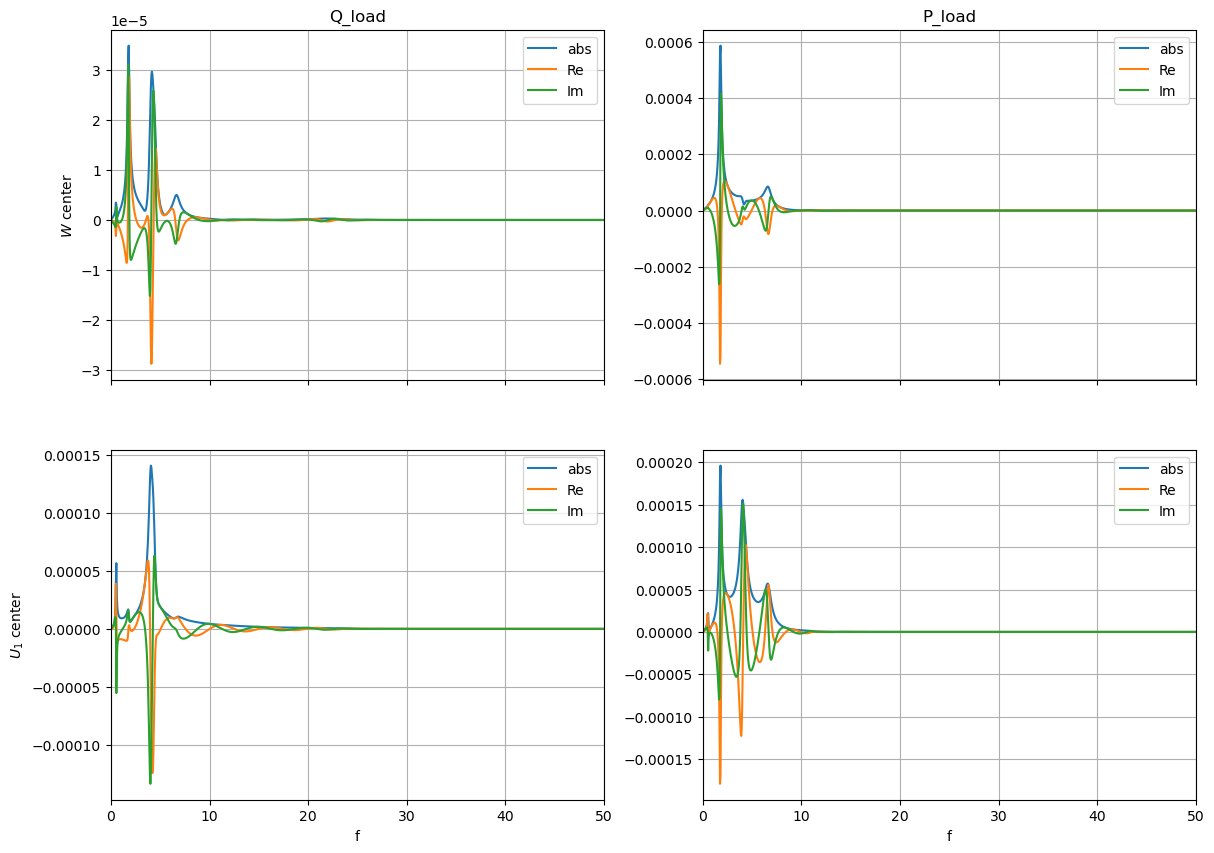

In [18]:
fig, axs = plt.subplots(2, 2, sharex=True, figsize=(14,10))
axs[0,0].plot(freq, abs(W_center_Q * Q_omega))
axs[0,0].plot(freq, (W_center_Q * Q_omega).real)
axs[0,0].plot(freq, (W_center_Q * Q_omega).imag)
axs[0,0].set_title('Q_load')

axs[0,1].plot(freq, abs(W_center_P * P_omega))
axs[0,1].plot(freq, (W_center_P * P_omega).real)
axs[0,1].plot(freq, (W_center_P * P_omega).imag)
axs[0,1].set_title('P_load')

axs[1,0].plot(freq, abs(U1_center_Q * Q_omega))
axs[1,0].plot(freq, (U1_center_Q * Q_omega).real)
axs[1,0].plot(freq, (U1_center_Q * Q_omega).imag)
                        
axs[1,1].plot(freq, abs(U1_center_P * P_omega))
axs[1,1].plot(freq, (U1_center_P * P_omega).real)
axs[1,1].plot(freq, (U1_center_P * P_omega).imag)
                        
for ax in axs.flat:
    ax.grid()
    ax.legend(['abs','Re', 'Im'])
    
axs[0,0].set_ylabel('$W$ center')
axs[1,0].set_ylabel('$U_1$ center')
axs[1,0].set_xlabel('f')
axs[1,1].set_xlabel('f')
axs[0,0].set_xlim([0,50])
axs[1,0].set_xlim([0,50])
axs[1,1].set_xlim([0,50])
axs[0,1].set_xlim([0,50]);

### Inverse Fourier transform
Hereafter, we search for the time domain response by taking the inverse fourier transform

In [19]:
w1_center = fft.irfft(W_center_Q * Q_omega + W_center_P * P_omega) * N /2
u1_center = fft.irfft(U1_center_Q * Q_omega + U1_center_P * P_omega) * N /2

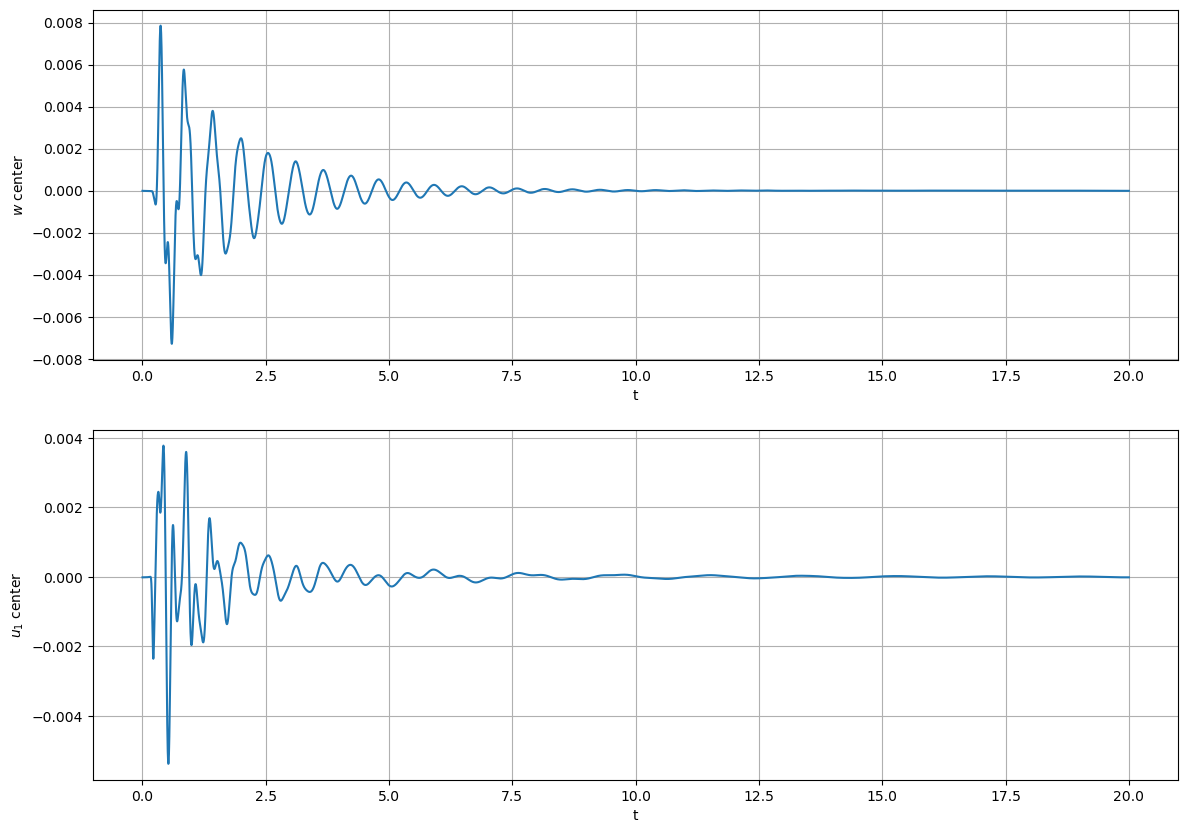

In [20]:
fig, axs = plt.subplots(2,figsize=(14,10))
axs[0].plot(t, w1_center)
axs[1].plot(t, u1_center)

for ax in axs.flat:
    ax.grid()
    ax.set_xlabel('t')

axs[0].set_ylabel('$w$ center')
axs[1].set_ylabel('$u_1$ center');